In [16]:
import pandas as pd 
import numpy as np

data = pd.read_csv('EURUSD_p8.csv')
data


,Unnamed: 0,Time,Open,High,Low,Close,volume,spread,real_volume,sma_20,sma_200,bearish_cross,bullish_cross,engulfing,bullish_engulfing,bearish_engulfing
0,38500,2023-06-15 22:57:00,1.09458,1.09482,1.09457,1.09469,135,16,0,1.094743,1.090165,False,True,0,False,False
1,38501,2023-06-15 23:00:00,1.09467,1.09482,1.09465,1.09481,85,16,0,1.094743,1.090215,False,True,0,False,False
2,38502,2023-06-15 23:03:00,1.09480,1.09483,1.09466,1.09468,59,16,0,1.094738,1.090266,False,True,0,False,False
3,38503,2023-06-15 23:06:00,1.09468,1.09469,1.09464,1.09468,58,16,0,1.094735,1.090319,False,True,0,False,False
4,38504,2023-06-15 23:09:00,1.09465,1.09467,1.09464,1.09466,24,16,0,1.094731,1.090372,False,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,43995,2023-07-03 09:42:00,1.08878,1.08897,1.08875,1.08892,91,16,0,1.089629,1.090771,True,False,0,False,False
5496,43996,2023-07-03 09:45:00,1.08891,1.08907,1.08889,1.08900,101,16,0,1.089521,1.090762,True,False,0,False,False
5497,43997,2023-07-03 09:48:00,1.08900,1.08915,1.08900,1.08907,97,16,0,1.089417,1.090753,True,False,0,False,False
5498,43998,2023-07-03 09:51:00,1.08908,1.08939,1.08895,1.08928,128,16,0,1.089324,1.090744,True,False,0,False,False


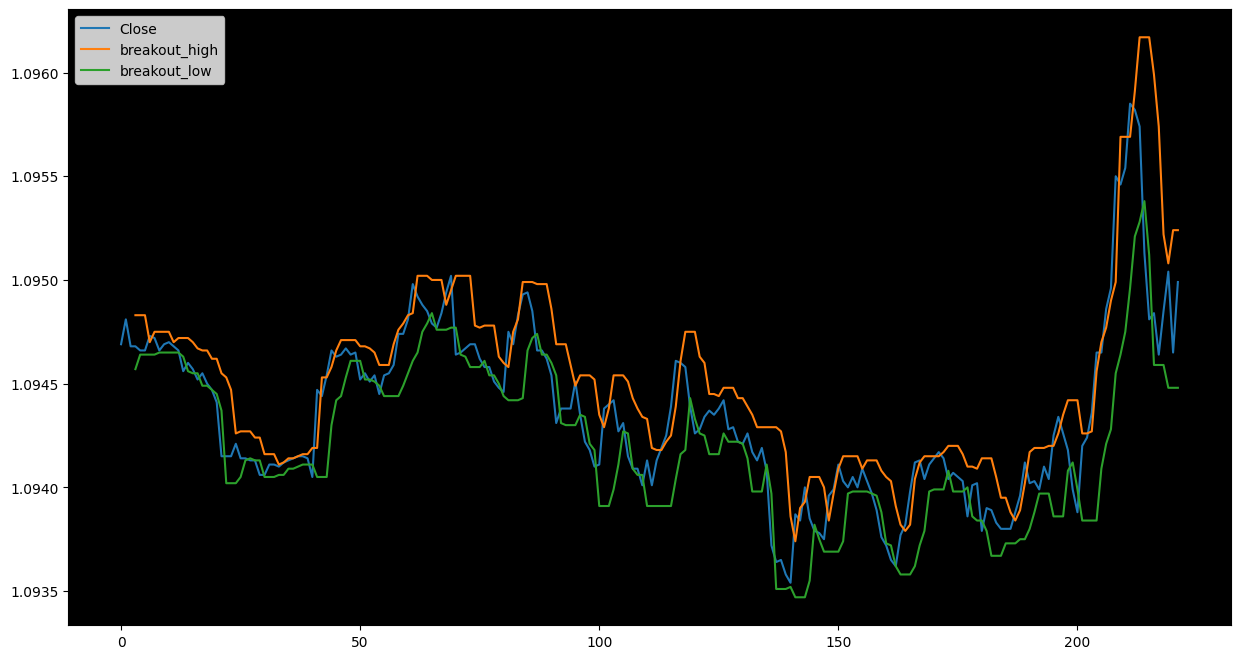

In [17]:
import matplotlib.pyplot as plt

data["breakout_high"] = data['High'].rolling(3).max().shift(1)
data['breakout_low'] = data['Low'].rolling(3).min().shift(1)
# ploting the data
plot = data[['Close', 'breakout_high' , 'breakout_low']].head(222).plot(figsize=(15,8))
plot.set_facecolor('black')  # Set background to black


In [ ]:
data['signal']= np.nan
# creating my conditions 
buy = data['Close'] < data['breakout_low']
sell = data['Close'] > data['breakout_low']
# adding the signals to the data
data.loc[buy,'signal'] = 1
data.loc[sell , 'signal'] = -1


AttributeError: 'list' object has no attribute 'head'

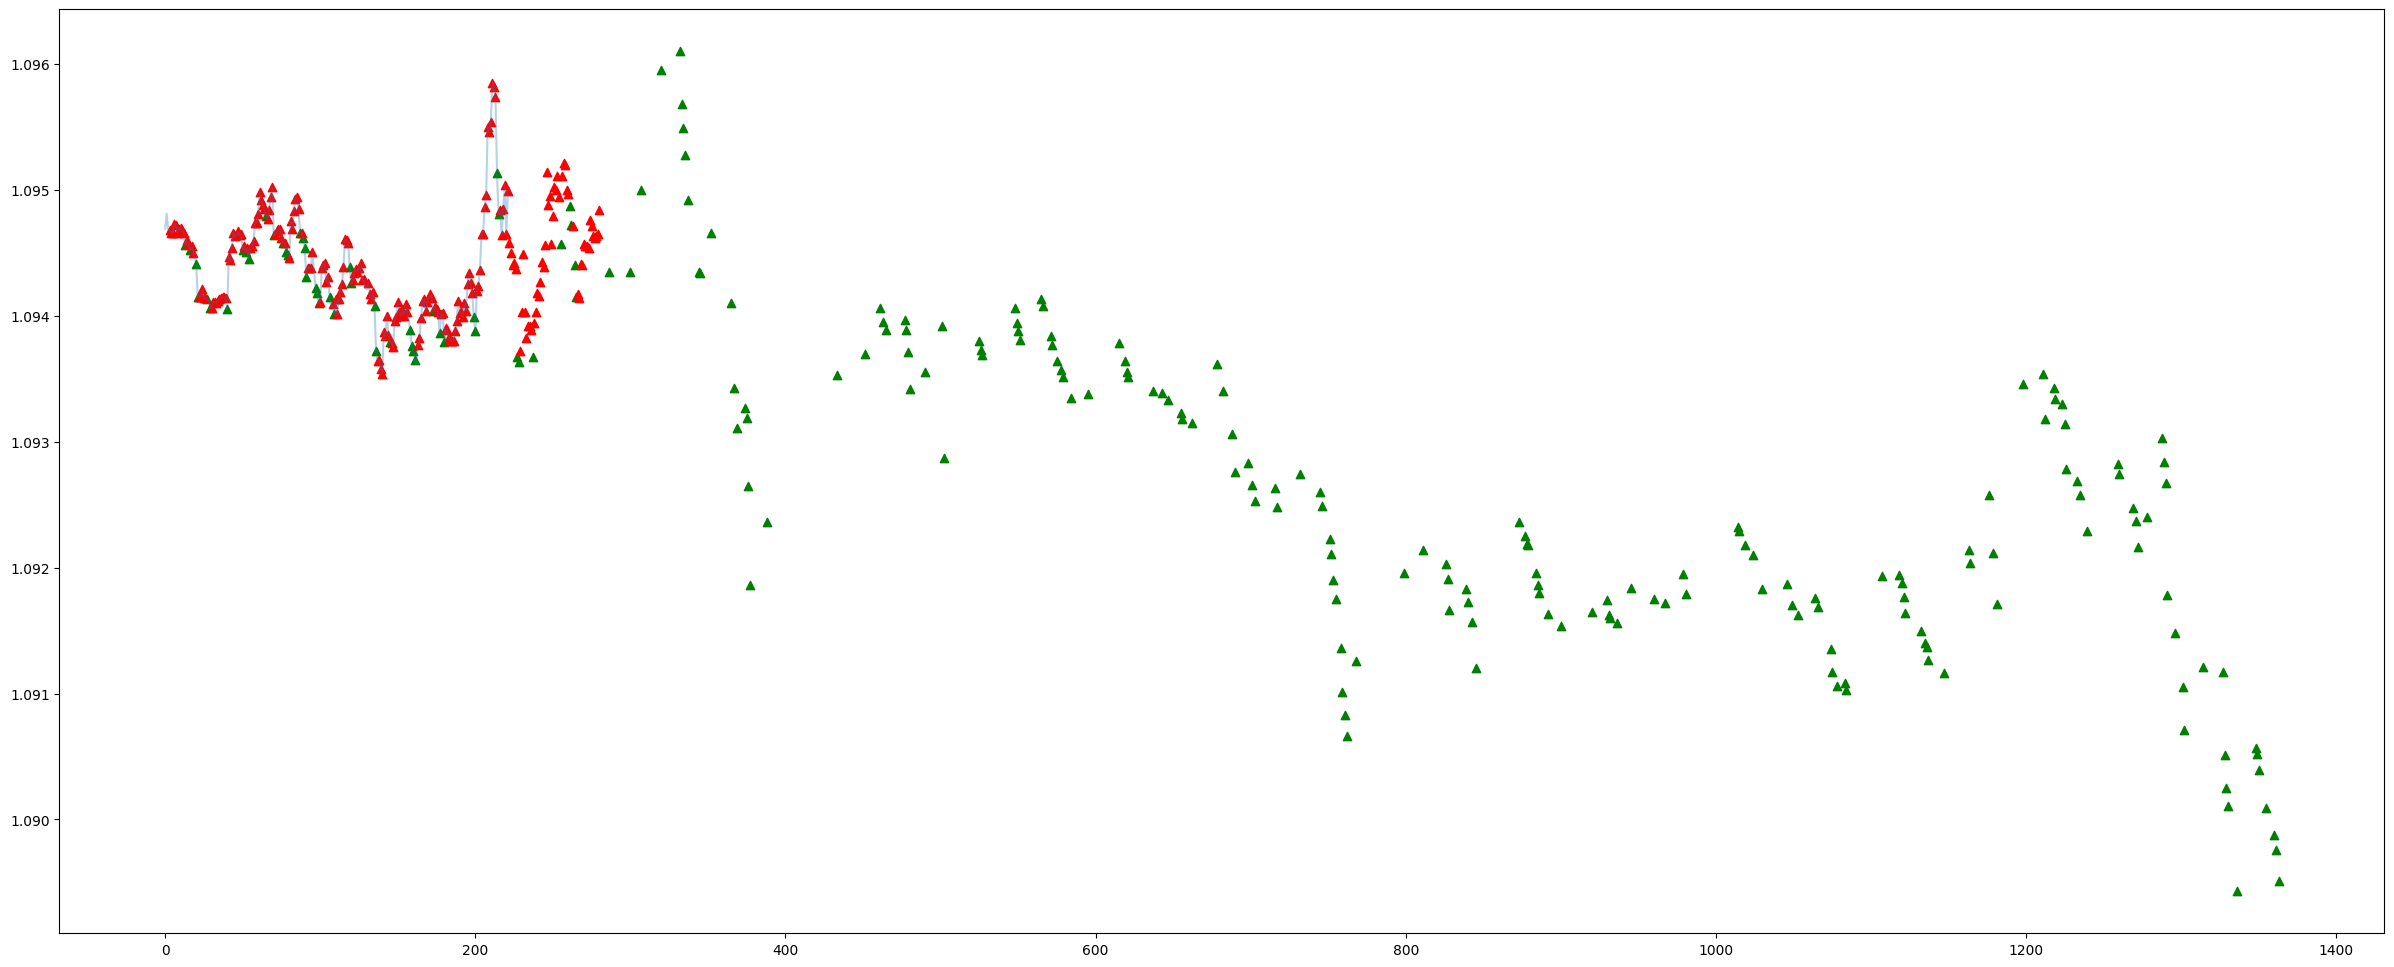

In [38]:
open_order = data.loc[data['signal'] == 1].head(222).index
close_order = data.loc[data['signal'] == -1].head(222).index

plt.figure(figsize=(30, 12))

plt.scatter(open_order, data.loc[open_order]['Close'].head(222), color='green', marker='^', label='buy')  # Add label for green scatter
plt.scatter(close_order, data.loc[close_order]['Close'].head(222), color='red', marker='^', label='sell')  # Add label for red scatter

plt.plot(data['Close'].head(222).index, data['Close'].head(222), alpha=0.33, label='EURUSD').head(222)  # Add label for line plot

plt.legend() # Call legend without explicit labels
plt.show()
